# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science

## **Yelp review prediction**


**Harvard University**<br/>
**Fall 2023**<br/>
**Instructors**: Pavlos Protopapas & Kevin Rader<br/>
**Project Members**: Oleg Pavliv and Elianne Sacher

## **Python Libraries**

Our code uses the following libraries:


The code you've shared utilizes a wide range of Python libraries, each serving a specific purpose in data analysis, visualization, and machine learning tasks. Here's a high-level overview of these libraries and their general uses:

1. **requests**: A library for sending HTTP requests, often used for web scraping or API interactions.

2. **IPython.core.display.HTML**: Part of IPython, used for displaying HTML content in Jupyter notebooks.

3. **seaborn (sns)**: A data visualization library based on matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics.

4. **matplotlib.pyplot**: A plotting library for creating static, interactive, and animated visualizations in Python.

5. **pandas**: A fast, powerful, flexible, and easy-to-use open-source data analysis and manipulation tool, built on top of the Python programming language.

6. **numpy (np)**: A library for numerical computing, providing support for arrays, mathematical functions, linear algebra, and more.

7. **sys, io**: Standard Python libraries for interacting with the system and handling input/output operations.

8. **scipy (sp)**: A library used for scientific and technical computing.

9. **sklearn (scikit-learn)**: A machine learning library providing tools for data mining and data analysis. It includes various classification, regression, and clustering algorithms.

10. **xgboost (xgb)**: An optimized distributed gradient boosting library designed to be highly efficient, flexible, and portable.

11. **eli5**: A library for debugging machine learning classifiers and explaining their predictions.

12. **shap**: A library to explain the output of any machine learning model using Shapley values.

13. **graphviz**: A package for creating a visual representation of graphs.

14. **warnings**: A standard library module for handling warnings, allowing you to suppress or display warnings such as deprecation warnings.

15. **sklearn.tree**: For decision trees in classification.

16. **sklearn.ensemble**: For random forest models in both classification and regression.

In [1]:
# RUN THIS CELL
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

In [2]:
!pip install eli5

In [3]:
pip install shap

In [4]:
# Import libraries
import json
import requests
import zipfile
import io

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import scipy as sp
import sklearn as sk

from sklearn import tree
from sklearn import ensemble

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, BaggingClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error

from sklearn import datasets
from sklearn.metrics import r2_score

import xgboost as xgb
from xgboost import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import graphviz

import eli5
from eli5.sklearn import PermutationImportance

import shap

np.random.seed(109)
plt.rcParams["figure.figsize"] = (9,6)

from sklearn.model_selection import train_test_split

import warnings
# Suppress specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore")

## **Problem statement**

Our goal is to build a model based on the Yelp business review dataset that predicts the rating of a business based on business and user-related predictors as given in the dataset. We also aim to explore characteristics of users who tend to leave certain ratings or any other notable phenomena discovered during the implementation of the project.

You can view our final project presentation on Youtube by using the following link: https://www.youtube.com/watch?v=6iCIBPgu3FU

## **Motivation and Context**

The Yelp business review dataset provides a unique opportunity to dissect the dynamics of customer satisfaction, business attributes, and user behavior.

This project is motivated by the dual objective of constructing a predictive model for business ratings, offering actionable insights for businesses to enhance customer satisfaction, and unraveling user characteristics associated with specific ratings. By leveraging the rich data within the Yelp dataset, we aim to provide businesses with a tool for informed decision-making while contributing to a deeper understanding of consumer behavior in the realm of online reviews. This exploration is poised to bridge the gap between businesses and customers in the dynamic landscape of digital interactions.

<a id="contents"></a>

## **Notebook contents**

- [**Data Description**](#data)
- [**Initial Inspection of Datasets**](#EDA)
  - [**Loading Dataset**](#load)
  - [**Quick Methods for Dataset Investigation**](#inv)
  - [**Investigating Relationship Between The Response Variable (Stars) and The Predictors**](#corr)
  - [**Missing Values**](#miss_vals)

- [**Inspection of Processed Datasets**](#EDA2)
  - [**Processing Dataset**](#proc)
  - [**Quick Methods for Dataset Investigation**](#inv2)
  - [**Investigating Relationship Between The Response Variable (Stars) and The Predictors**](#corr2)
  - [**Missing Values**](#miss_vals2)
- [**Deeper Understanding of the Data**](#deep)
  - [**Trends and Patterns**](#trends)
  - [**Class Imbalances and Outliers**](#out)
- [**Baseline Model Implementation: `stars` as categorical**](#base)
  - [**Why Not Linear Regression**](#not)
  - [**Random Forest**](#RF)
  - [**Implementation of Single Tree with Optimal Max Depth**](#impST)
  - [**Implementation of Random Forest**](#impRF)
  - [**XGBoost**](#XGBoost)
  - [**Implementation of XGBoost**](#impXG)
- [**Baseline Model Implementation: `stars` as quantitative**](#base2)
  - [**Implementation of Random Forest**](#impRFreg)
- [**Final Model Implementation**](#finModel)
  - [**Implementation of XGBoost**](#impXGreg)
- [**Conclusion**](#conc)
  - [**Conclusion and Inferences**](#conc&inf)
  - [**Future Work and Scope of Improvement**](#future)

<a id="data"></a>


## **Data Description**

In this section, we will provide some information about the data source, the data collection process, any preprocessing steps that we will take in the later code, and a description of the methods we used to explore the data, including initial explorations, data cleaning, and reconciliation.

[Return to contents](#contents)

1. The data came from the Yelp database that’s for academic use. There were 3 datasets available. One for customers, their network, ratings, and check-ins. The second dataset included the text of the actual reviews, and the last dataset included information about the businesses.
2.   To conserve computing, we initially took the first thousand entries in the dataset to explore each and develop code for further pre-processing. We then applied the process to the whole dataset.
3.   We have limited entries to those that contain `food` or `restaurant` in the description as we aim only to analyze food-related establishments and there were many other businesses in the dataset.
4. We unwrapped attribute data and further unwrapped `Ambience`, `BusinessParking`, and `GoodForMeal` and created new columns for each unique attribute and corresponding True/False.  
5. Then we dropped columns that were not pertinent to our model or insights to further conserve compute. We dropped columns that we assessed are not pertinent to our future model, because it's solely for Yelp's customer stack, unrelatedness to food-related business, or has overwhelming missingness of data: `address`, `latitude`, `postal_code`, `longitude`, `is_open`, `business_id`, `hours`, `BestNights`, `Music`, `RestaurantsAttire`, `HairSpecializesIn`.  
6. Certain datapoint strings were cleaned for artifacts such as sporadic u' prefixes.
7. Columns `Alcohol`, `AgesAllowed`, `WiFi`, `Smoking`, and `BYOBCorkage` were one-hot encoded to facilitate visualization and model building.
9. Yelp-inputted `None` strings were replaced with NaaN.
10. We replaced all True and False with 0, 1 to facilitate use in a regression model if chosen.
11. Noise level categorical values were transformed to cardinal numeric values ranging from `quiet` : `1` to `loud` : `3`.
12. We have observed that the missing values were present in the attributes of restaurants. We have chosen to replace the missing values with the mode of the column entries in the dataset so that the most common feature of a food establishment will be implied. For example, if most restaurants are determined to have free WIFI, it will be assumed that a restaurant with a missing value also has free WIFI.

<a id="EDA"></a>
    
## **Initial Inspection of Datasets**

In this section, we will perform an initial inspection of our dataset. We will look closely into what information datasets provide before moving into analyzing the said information and manipulating it.

[Return to contents](#contents)

<a id="load"></a>
    
### **Loading Datasets**

In order to investigate our data, we must first load our data. Given that we want anyone with this notebook to be able to re-run our code, we've uploaded our data to a public GitHub link. Then, in the following code block, we will load our data from the said link:

In [5]:
# URL of the zipped JSON file
url = 'https://github.com/elianne-sacher/yelp/raw/main/business_large.zip'

# Fetch the zipped file
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Open the zipped file
    with zipfile.ZipFile(io.BytesIO(response.content)) as thezip:
        # Extract the file names
        filenames = thezip.namelist()
        # List to hold all JSON objects
        data_list = []
        # Assuming there's only one file in the zip and it's a JSON
        with thezip.open(filenames[0]) as thefile:
            # Read and parse each line as a separate JSON object
            for line in thefile:
                json_object = json.loads(line)
                data_list.append(json_object)
    # Create DataFrame from list of dictionaries
    df_og = pd.DataFrame(data_list)
else:
    print("Failed to retrieve the file. Status code:", response.status_code)

<a id="inv"></a>
    
### **Quick Methods for Dataset Investigation**

Our dataset includes information about the businesses with categorical variables such as `name`, `address`, and `lat-long coordinates`, along with numerical such as `review_count`, and our target response numerical variable `stars`. Some columns will not be used as predictors, for example, `name` and `address`, given that we don't assume that those will have much correlation with `stars` and given that they are of categorical type. Pre-processing data analysis follows.

 ############################################### 
 ################## df.head() ################## 
 ############################################### 


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


 ############################################### 
 ################## df.info() ################## 
 ############################################### 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), objec

None

 ############################################### 
 ################ df.describe() ################ 
 ############################################### 


,latitude,longitude,stars,review_count,is_open
count,150346.000000,150346.000000,150346.000000,150346.000000,150346.00000
mean,36.671150,-89.357339,3.596724,44.866561,0.79615
std,5.872759,14.918502,0.974421,121.120136,0.40286
min,27.555127,-120.095137,1.000000,5.000000,0.00000
25%,32.187293,-90.357810,3.000000,8.000000,1.00000
50%,38.777413,-86.121179,3.500000,15.000000,1.00000
75%,39.954036,-75.421542,4.500000,37.000000,1.00000
max,53.679197,-73.200457,5.000000,7568.000000,1.00000


 ############################################### 
 ################## df.dtypes ################## 
 ############################################### 


business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
dtype: object

 ############################################### 
 ################# sns.histplot ################ 
 ############################################### 


Text(0.5, 1.0, 'Histogram of stars')

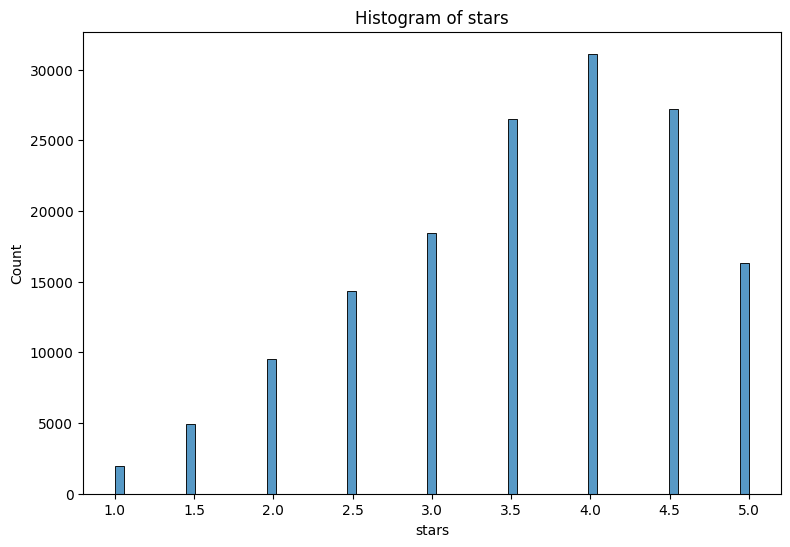

In [6]:
# various ways of quick inspection
print(" ############################################### ")
print(" ################## df.head() ################## ")
print(" ############################################### ")
display(df_og.head())
print(" ############################################### ")
print(" ################## df.info() ################## ")
print(" ############################################### ")
display(df_og.info())
print(" ############################################### ")
print(" ################ df.describe() ################ ")
print(" ############################################### ")
display(df_og.describe())
print(" ############################################### ")
print(" ################## df.dtypes ################## ")
print(" ############################################### ")
display(df_og.dtypes)
print(" ############################################### ")
print(" ################# sns.histplot ################ ")
print(" ############################################### ")
sns.histplot(df_og['stars'], kde=False)
plt.title(f'Histogram of stars')

From the histogram, we can see that our data is leaning more towards a higher rating. The distribution is not a classic normal distribution. Instead, we can see a relatively steady incline towards the peak at `stars=4` and then a sharper decline from 4 onwards. We can also see that our data is categorized into 9 buckets between 1 to 5.

<a id="corr"></a>
    
### **Investigating the Relationship Between The Response Variable (`Stars`) and The Predictors**

To investigate the relationship between the response variable and the predictors in our dataset, we will investigate the pair plots between all the quantitative variables and the response variable and inspect the correlation heatmap. Both of these inspection methods, the pairplots and the correlation heatmap below, make it clear that the pre-processed data and the response variables it includes don't show a clear relationship.

 ################################################## 
 ################## sns.heatmap ################### 
 ################################################## 


<Axes: >

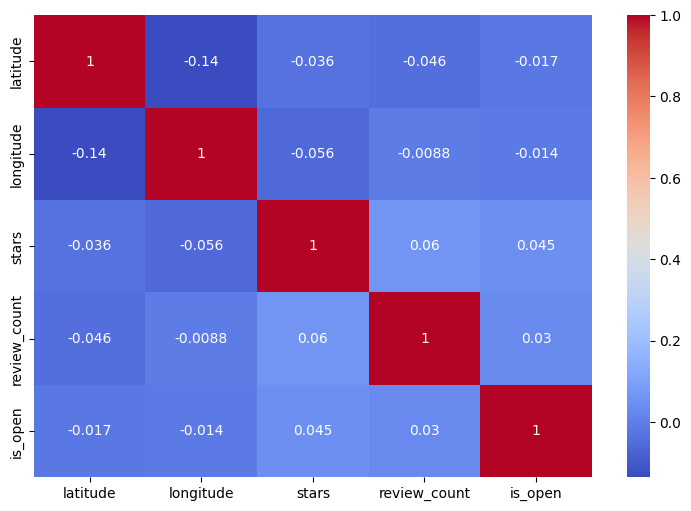

In [7]:
# Investigating for correlated values
print(" ################################################## ")
print(" ################## sns.heatmap ################### ")
print(" ################################################## ")
display(sns.heatmap(df_og.corr(), cmap='coolwarm',annot=True))

See analysis after the next code block.

 ############################################## 
 ################## pairplot ################## 
 ############################################## 


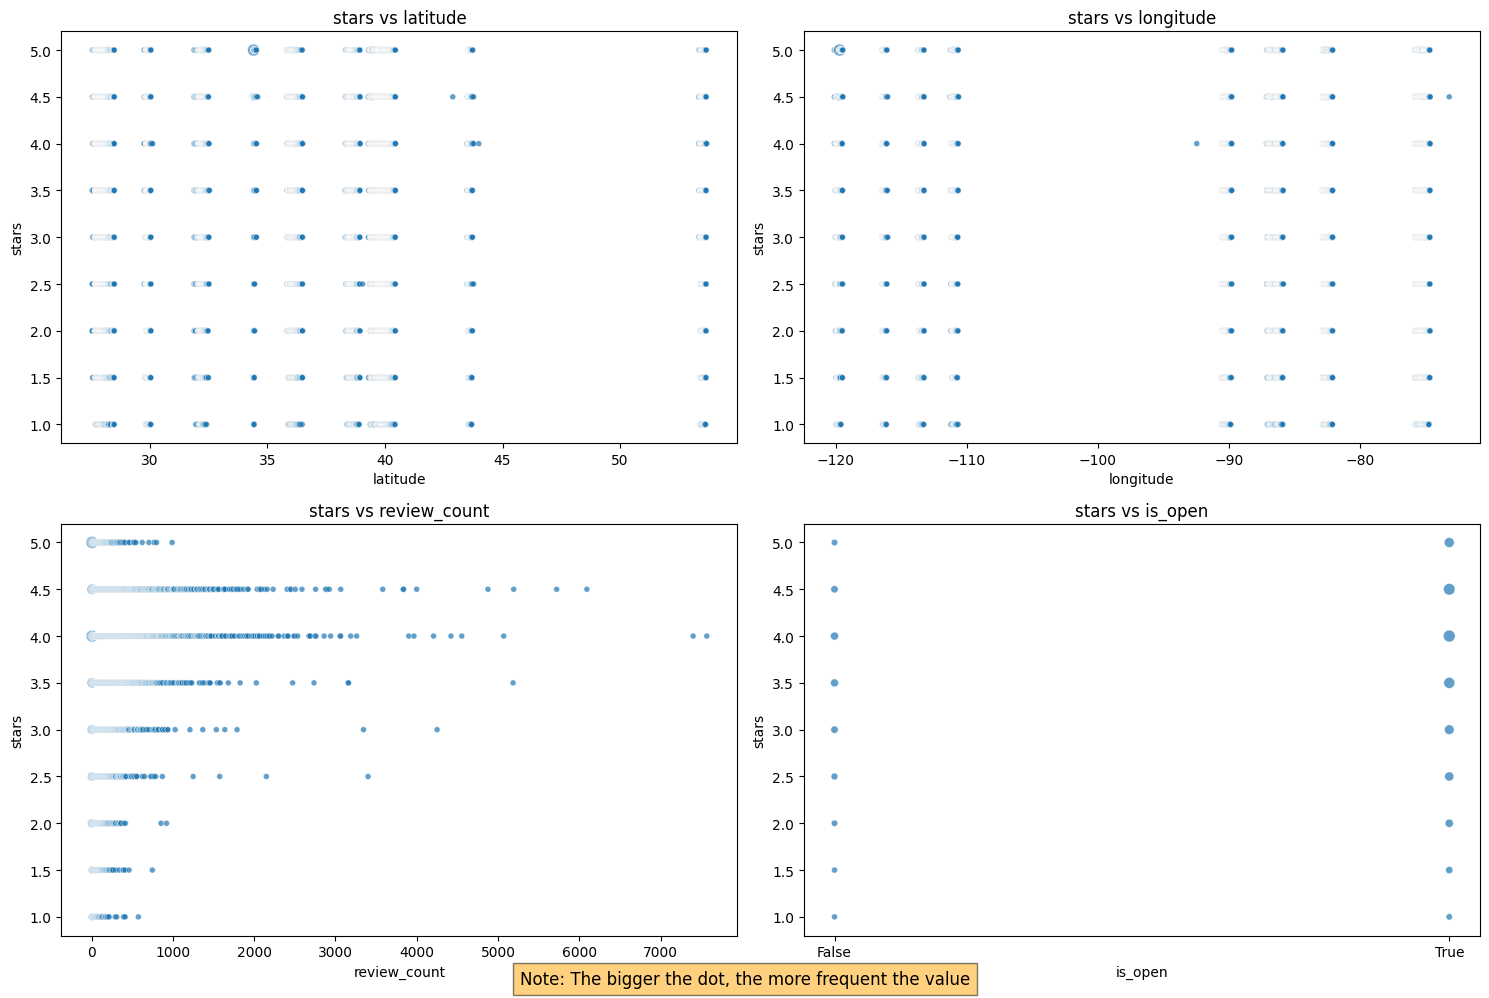

In [8]:
# Creating pairplots with our response variable
print(" ############################################## ")
print(" ################## pairplot ################## ")
print(" ############################################## ")

numeric_cols = df_og.select_dtypes(include=[np.number]).columns
x_vars = numeric_cols.drop('stars', errors='ignore')
num_vars = len(x_vars)
num_rows = int(np.ceil(num_vars / 2))
plt.figure(figsize=(15, 5 * num_rows))

# Loop through the variables
for i, var in enumerate(x_vars):
    plt.subplot(num_rows, 2, i + 1)
    unique_values = df_og[var].dropna().unique()

    # Create a frequency column based on both 'var' and 'stars'
    freq_df = df_og.groupby([var, 'stars']).size().reset_index(name='frequency')

    # Plot using frequency for size
    sns.scatterplot(x=var, y='stars', size='frequency', data=freq_df, alpha=0.7, legend=False)

    plt.title(f'stars vs {var}')
    plt.xlabel(f'{var}')
    plt.ylabel('stars')

    # Check if the variable is binary
    if len(unique_values) == 2 and all(val in [0, 1] for val in unique_values):
        plt.xticks([0, 1], ['False', 'True'])  # Set x-ticks for binary variable

# Add an annotation for dot size
plt.figtext(0.5, 0.01, "Note: The bigger the dot, the more frequent the value", ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.tight_layout()
plt.show()

We see little correlation in our initial data both from the heatmap and from the individual pair plots. Nonetheless, we are in grave need of preprocessing so that we use more of the data hidden in our current data's predictor variables.

<a id="miss_vals"></a>

### **Missing Values**


Missing data may arise due to a range of factors, such as human error (e.g., intentional non-response to survey questions), malfunctioning electrical sensors, or other causes. When data is missing, a significant amount of valuable information can be lost.

Some techniques that we will implement to deal with missing data, were shown in the lecture:
  - Deleting missing data: One approach is to simply delete any observations that have missing data. This approach is often used when the amount of missing data is small and is unlikely to bias the analysis.
  - Imputing missing data: Another approach is to impute, or estimate, the missing data values based on other available information. There are many imputation techniques available, including mean imputation, regression imputation, and multiple imputation. Imputation can be done using simple techniques or more complex methods depending on the nature of the data and the extent of the missingness.

In [9]:
# Looking into the data missingness after unwrapping each attribute

# Get missing rows count
n_rows_with_missingness = df_og.isna().any(axis=1).sum()

# Create a boolean df with True if NaN, get cols where True, count
n_cols_with_missingness = len(df_og.columns[df_og.isnull().any()])

# Get name of col from missing count cols
col_missingness = df_og.isna().sum()


# display your results with this code
print('MISSINGNESS OF DATA:')
print()
print('# rows with missingness for our dataset:', n_rows_with_missingness)
print('# columns with missingness for our dataset:', n_cols_with_missingness)
print(f'\ncolumns with missingness:\n{col_missingness}')

MISSINGNESS OF DATA:

# rows with missingness for our dataset: 32728
# columns with missingness for our dataset: 3

columns with missingness:
business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64


Given the printout of the code above, we noticed that our dataset has missing values. In this dataset, the columns/values that are missing are `attributes`, `hours`, and `categories`. We don't believe that we will need the `hours` values for our analysis, so, one solution for this missing variable is deleting it completely from our dataset. From the `categories` field, we will only be looking at entries that include `Food` or `Restaurants` (due to our sheer interest showcased in our problem statement). Given that there aren't too many rows that are missing this value, we feel that getting rid of the entries missing this field won't have a huge difference in the outcome; therefore, we will skip those entries. As for the `attributes`, we believe that this is a very important field given that it contains many other relevant/correlated values/variables. Therefore, instead of deleting completely the rows that don't contain the `attributes` field, we will pre-process our data at pre-set the NULL values to 0/False/anything else that might fit.

An additional important note is that while handling the data, we might need to carefully deal with the missingness and dimension mismatch of data since different merchants might have different feature fields.

<a id="EDA2"></a>
    
## **Inspection of Processed Datasets**

In this section, we will perform an initial inspection of our processed dataset. We will look closely into what information datasets provide before moving into analyzing the said information and manipulating it.

[Return to contents](#contents)

<a id="miss_vals"></a>

### **Processing The Data**

In this processing step, we will filter out the entries that are not in the category of `Food` or `Restaurants`, given that we are only interested in Yelp scores for these specific categories (see our problem statement).

Per the missingness analysis in the previous section, we will also "unwrap" the attributes field, so that each attribute has its own column and can be analyzed later as a predictor variable.

We will then also remove variables/columns that are not appropriate for our model, which include: `address`, `latitude`, `postal_code`, `longitude`, `is_open`, `categories`, `business_id`, `hours`, `BestNights`, `Music`, `categories`, `HairSpecializesIn`, and `RestaurantsAttire`. We will be dropping them given that their correlation with `stars` is relatively low (as you can see from the code block below), given that some of them are strings of non-categorical form which will be hard to incorporate in our model, and given that some of them have significant missingness that we can easily get rid of without impacting our model's effectiveness (showcased in the code block below).

In [10]:
## Helper function

def is_column_only_strings(df, column):
    # Function that checks each element in these columns.
    if df[column].dtype == object:  # Check if the column data type is 'object', which is often used for strings
        for item in df[column]:
            if not isinstance(item, str):  # Check if each item is not a string
                return False
            try:
                float(item)  # Try converting the string to a float
                return False  # Conversion succeeded, so it's likely a string representation of a number
            except ValueError:
                continue  # Conversion failed, confirming it's a non-numeric string
        return True  # All checks passed, the column contains only non-numeric strings
    else:
        return False  # Column is not of 'object' type, so it's not a string column

In [11]:
# Filter for entries that include "Food" or "Restaurants" under categories
df = df_og[df_og['categories'].str.lower().str.contains('food|restaurants', na=False)].copy()

# Identifying all unique attributes across filtered entries
unique_attributes = set()
for attr_list in df['attributes'].dropna().tolist():
    unique_attributes.update(attr_list.keys())

# Define function to unwrap nested columns
def unwrap(df, nested_columns):
    for attr in unique_attributes:
        df[attr] = df['attributes'].apply(lambda x: x.get(attr, pd.NA) if x else pd.NA)

    for col in nested_columns:
        df[col] = df[col].apply(lambda x: eval(x) if pd.notna(x) and isinstance(x, str) else x)
        nested_df = df[col].apply(lambda x: pd.Series(x) if pd.notna(x) else pd.Series(dtype='object'))
        # Add prefix to each new column based on original column
        nested_df = nested_df.add_prefix(f"{col}_")
        # Add unwrapped columns to df
        df = pd.concat([df, nested_df], axis=1)
        # Drop original column
        df.drop(columns=[col], inplace=True)

    df.drop(columns=['attributes'], inplace=True)
    return df

# Nested columns to be unwrapped
nested_columns = ['Ambience', 'BusinessParking', 'GoodForMeal', 'DietaryRestrictions']

# Unwrapping the specified nested columns
df = unwrap(df, nested_columns)

# Columns to drop for correlation
columns_to_drop = ['address', 'latitude', 'postal_code', 'longitude', 'is_open', 'categories', 'business_id', 'hours', 'BestNights', 'Music', 'RestaurantsAttire', 'HairSpecializesIn', 'AcceptsInsurance']

# Adding 'stars' to the list for correlation calculation
columns_to_drop.append('stars')

# Creating a subset dataframe
subset_df = df[columns_to_drop]

# Calculate correlation of these columns with 'stars'
correlation_with_stars = subset_df.corr()['stars'].dropna()

# Drop columns that will not be used in the model
df.drop(columns=columns_to_drop[0:-1], inplace=True)

# Counting missing values in each column and filtering out the zeros
non_zero_missing_values = subset_df.isnull().sum()
non_zero_missing_values = non_zero_missing_values[non_zero_missing_values > 0]

# Print justifying factors for dropping these
print("Dropped predictors' correlation with 'stars':")
print(correlation_with_stars.drop('stars'))
print()
# Check if column in columns_to_drop contains just strings
print("Predictors that are purely strings:")
for column in columns_to_drop:
    if is_column_only_strings(subset_df, column):
        print(f"- {column}")
print()
print("Count of NaN values in these columns:")
print(non_zero_missing_values)

Dropped predictors' correlation with 'stars':
latitude    -0.025280
longitude   -0.026208
is_open      0.004455
Name: stars, dtype: float64

Predictors that are purely strings:
- categories
- business_id

Count of NaN values in these columns:
hours                 9335
BestNights           59944
Music                58788
RestaurantsAttire    25558
HairSpecializesIn    64614
AcceptsInsurance     64539
dtype: int64


Perform one-hot encoding for our predictors to have a better performing model, replace `None` and `<NA>` string values with NaN, replace true or false values with ones and zeros, and encode the noise level and price with numerical equivalent values.

In [12]:
##### Further data processing ######

# Remove the 'u' prefix from the strings
for column in ['NoiseLevel', 'Alcohol', 'AgesAllowed', 'WiFi', 'Smoking', 'BYOBCorkage']:
  df[column] = df[column].str.strip("u'")


## One-hot encoding ##
# Columns to be one-hot encoded
columns_to_encode = ['Alcohol', 'AgesAllowed', 'WiFi', 'Smoking', 'BYOBCorkage']

# Apply one-hot encoding and drop original columns
encoded_columns = pd.get_dummies(df[columns_to_encode])
df = df.drop(columns_to_encode, axis=1).join(encoded_columns)

# Check if 'None' or '<NA>' exist in the DataFrame
values_to_check = ['None', '<NA>']
replace_needed = any(df.isin(values_to_check).any())

# Replace 'None' and '<NA>' with NaN if they exist
if replace_needed:
    df.replace(values_to_check, np.nan, inplace=True)

# Replace True and False values with 1s and 0s
df.replace({"True": 1, "False": 0, True: 1, False: 0}, inplace=True)

# Define a mapping from category to integer
noise_level_mapping = {
    'quiet': 1,
    'average': 2,
    'loud': 3,
}

# Apply the mapping to 'NoiseLevel'
df['NoiseLevel_Encoded'] = df['NoiseLevel'].map(noise_level_mapping)
df.drop(columns=['NoiseLevel'])

# Convert Price range to numeric
df['RestaurantsPriceRange'] = pd.to_numeric(df['RestaurantsPriceRange2'], errors='coerce')
df.drop(columns=['RestaurantsPriceRange2'])

,name,city,state,stars,review_count,RestaurantsDelivery,Corkage,HasTV,Open24Hours,ByAppointmentOnly,...,Smoking_None,Smoking_no,Smoking_outdoor,Smoking_yes,BYOBCorkage_None,BYOBCorkage_no,BYOBCorkage_yes_corkage,BYOBCorkage_yes_free,NoiseLevel_Encoded,RestaurantsPriceRange
3,St Honore Pastries,Philadelphia,PA,4.0,80,0,<NA>,<NA>,<NA>,0,...,0,0,0,0,0,0,0,0,NaN,1.0
4,Perkiomen Valley Brewery,Green Lane,PA,4.5,13,<NA>,<NA>,<NA>,<NA>,<NA>,...,0,0,0,0,0,0,0,0,NaN,NaN
5,Sonic Drive-In,Ashland City,TN,2.0,6,1,<NA>,1,<NA>,0,...,0,0,0,0,0,0,0,0,NaN,1.0
8,Tsevi's Pub And Grill,Affton,MO,3.0,19,0,<NA>,1,<NA>,<NA>,...,0,0,0,0,0,0,0,0,2.0,1.0
9,Sonic Drive-In,Nashville,TN,1.5,10,1,<NA>,1,<NA>,0,...,0,0,0,0,0,0,0,0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150327,Dutch Bros Coffee,Boise,ID,4.0,33,0,<NA>,0,<NA>,<NA>,...,0,0,0,0,0,0,0,0,3.0,1.0
150328,Savaya Coffee Market,Oro Valley,AZ,4.5,41,0,<NA>,<NA>,<NA>,<NA>,...,0,0,0,0,0,0,0,0,NaN,2.0
150336,Adelita Taqueria & Restaurant,Philadelphia,PA,4.5,35,1,<NA>,1,<NA>,<NA>,...,0,0,0,0,0,0,0,0,NaN,2.0
150339,The Plum Pit,Aston,DE,4.5,14,0,<NA>,<NA>,<NA>,<NA>,...,0,0,0,0,0,0,0,0,NaN,1.0


<a id="inv2"></a>
    
### **Quick Methods for Dataset Investigation**

Our dataset includes information about the businesses with categorical variables such as `name`, `city`, `state`, `price range`, `noise level`, and `ambiance details` (we've divided it to different booleans), along with numerical such as `review_count`, and boolean values (we can assume them to be numerical) such as `coat check` option, `open 24 hours`, whether `dogs are allowed`, whether it `takes reservations` or `delivers`, if it `accepts credit cards`, if it has `outdoor seating`, etc. This is not a comprehensive list given that we have many variables.

 ############################################### 
 ################## df.head() ################## 
 ############################################### 


,name,city,state,stars,review_count,RestaurantsDelivery,Corkage,HasTV,Open24Hours,ByAppointmentOnly,...,Smoking_None,Smoking_no,Smoking_outdoor,Smoking_yes,BYOBCorkage_None,BYOBCorkage_no,BYOBCorkage_yes_corkage,BYOBCorkage_yes_free,NoiseLevel_Encoded,RestaurantsPriceRange
3,St Honore Pastries,Philadelphia,PA,4.0,80,0,<NA>,<NA>,<NA>,0,...,0,0,0,0,0,0,0,0,NaN,1.0
4,Perkiomen Valley Brewery,Green Lane,PA,4.5,13,<NA>,<NA>,<NA>,<NA>,<NA>,...,0,0,0,0,0,0,0,0,NaN,NaN
5,Sonic Drive-In,Ashland City,TN,2.0,6,1,<NA>,1,<NA>,0,...,0,0,0,0,0,0,0,0,NaN,1.0
8,Tsevi's Pub And Grill,Affton,MO,3.0,19,0,<NA>,1,<NA>,<NA>,...,0,0,0,0,0,0,0,0,2.0,1.0
9,Sonic Drive-In,Nashville,TN,1.5,10,1,<NA>,1,<NA>,0,...,0,0,0,0,0,0,0,0,NaN,1.0


 ############################################### 
 ################## df.info() ################## 
 ############################################### 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 64616 entries, 3 to 150340
Data columns (total 78 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   name                             64616 non-null  object 
 1   city                             64616 non-null  object 
 2   state                            64616 non-null  object 
 3   stars                            64616 non-null  float64
 4   review_count                     64616 non-null  int64  
 5   RestaurantsDelivery              50845 non-null  object 
 6   Corkage                          3463 non-null   object 
 7   HasTV                            42408 non-null  object 
 8   Open24Hours                      24 non-null     object 
 9   ByAppointmentOnly                4937 non-null   obje

None

 ############################################### 
 ################ df.describe() ################ 
 ############################################### 


,stars,review_count,Ambience_romantic,Ambience_intimate,Ambience_touristy,Ambience_hipster,Ambience_divey,Ambience_classy,Ambience_trendy,Ambience_upscale,...,Smoking_None,Smoking_no,Smoking_outdoor,Smoking_yes,BYOBCorkage_None,BYOBCorkage_no,BYOBCorkage_yes_corkage,BYOBCorkage_yes_free,NoiseLevel_Encoded,RestaurantsPriceRange
count,64616.000000,64616.000000,38300.000000,37440.000000,38022.000000,37323.000000,36282.000000,38020.000000,36419.000000,38695.000000,...,64616.000000,64616.000000,64616.000000,64616.000000,64616.000000,64616.000000,64616.000000,64616.000000,34985.000000,54587.000000
mean,3.545956,76.614089,0.017572,0.021154,0.007469,0.026418,0.030731,0.151631,0.065296,0.010699,...,0.000062,0.031293,0.022487,0.002708,0.000077,0.011561,0.001563,0.009115,1.858482,1.617748
std,0.853919,173.383983,0.131391,0.143899,0.086103,0.160377,0.172592,0.358667,0.247050,0.102883,...,0.007868,0.174109,0.148261,0.051971,0.008796,0.106898,0.039505,0.095039,0.509243,0.588454
min,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,3.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
50%,3.500000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,4.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
max,5.000000,7568.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000


 ############################################### 
 ################# sns.histplot ################ 
 ############################################### 


Text(0.5, 1.0, 'Histogram of stars')

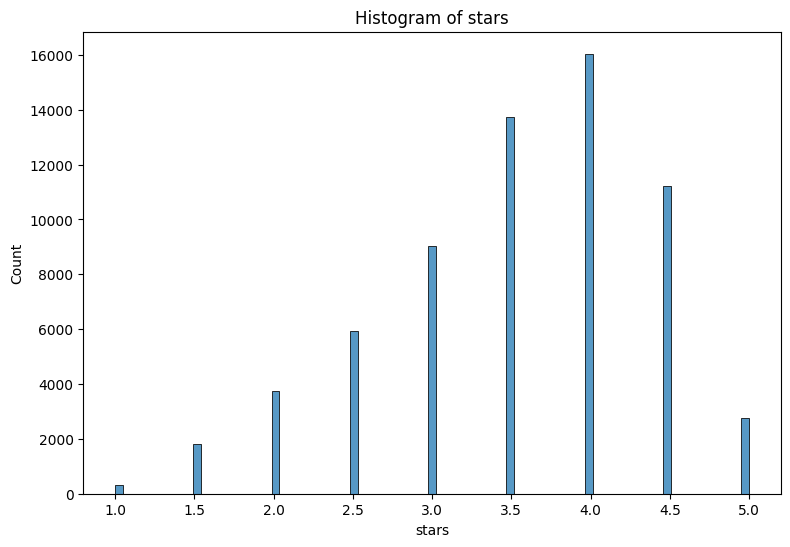

In [13]:
# various ways of quick inspection
print(" ############################################### ")
print(" ################## df.head() ################## ")
print(" ############################################### ")
display(df.head())
print(" ############################################### ")
print(" ################## df.info() ################## ")
print(" ############################################### ")
display(df.info())
print(" ############################################### ")
print(" ################ df.describe() ################ ")
print(" ############################################### ")
display(df.describe())
print(" ############################################### ")
print(" ################# sns.histplot ################ ")
print(" ############################################### ")
sns.histplot(df['stars'], kde=False)
plt.title(f'Histogram of stars')

The histogram appears to have not been affected by the data processing.

In [14]:
# Generate the summary statistics using df.describe() for the report
summary_stats = df.describe()

# Create a csv file
summary_stats.to_csv('stats.csv',sep=',', index=False, encoding='utf-8')

<a id="corr2"></a>
    
### **Investigating the Relationship Between The Response Variable (`Stars`) and The Predictors**

To investigate the relationship between the response variable and the predictors in our dataset, we will investigate the pair plots between all the quantitative variables and the response variable and inspect the correlation heatmap. From the correlation map, we can see that this processed dataset has more correlation than the pre-processed information. It is hard to see from the scatter plots a relationship between our response and our binary predictors, but some relationship is noticeable between the stars and the review count.

 ################################################## 
 ################## sns.heatmap ################### 
 ################################################## 


<Axes: >

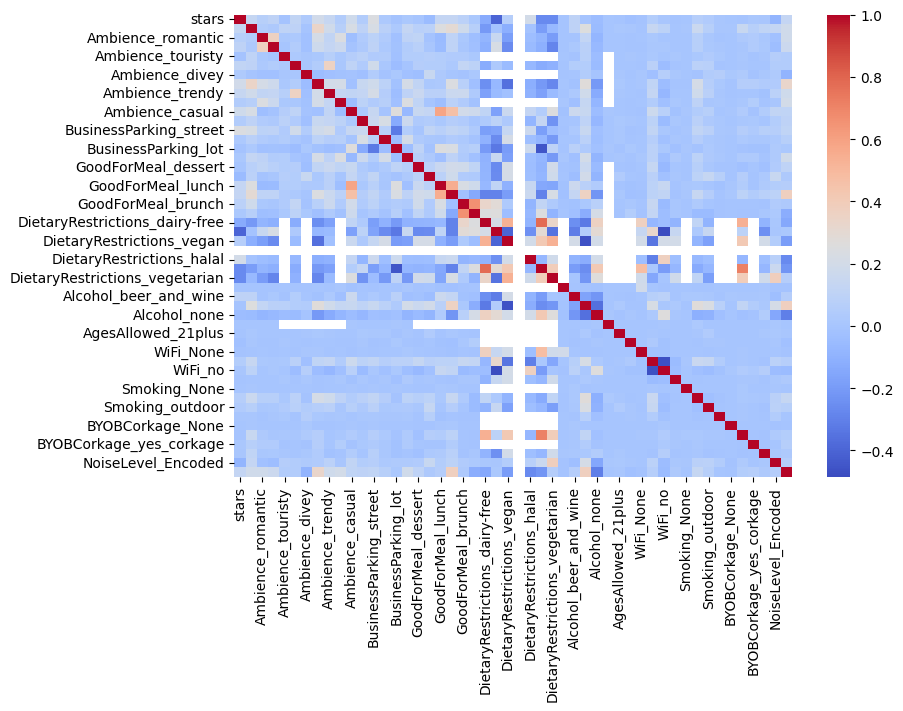

In [15]:
# Investigating for correlated values
print(" ################################################## ")
print(" ################## sns.heatmap ################### ")
print(" ################################################## ")
display(sns.heatmap(df.corr(), cmap='coolwarm'))

At first glance, we see more correlation with our data, which is a good start. Some of the predictors are too correlated to one another. In the next block, we will check which pairs are overly correlated and then delete the one that is missing more values.

In [16]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Identify pairs with high correlation
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

# Print out the highly correlated pairs
for pair in high_corr_pairs:
    print(f"Highly correlated pair: {pair}")

# Remove one variable from each correlated pair based on missing values
for pair in high_corr_pairs:
    # Compare the number of missing values in each variable of the pair
    if df[pair[0]].isnull().sum() > df[pair[1]].isnull().sum():
        # Remove the first variable if it has more missing values
        df.drop(pair[0], axis=1, inplace=True)
    else:
        # Otherwise, remove the second variable
        df.drop(pair[1], axis=1, inplace=True)

Highly correlated pair: ('DietaryRestrictions_soy-free', 'DietaryRestrictions_dairy-free')
Highly correlated pair: ('BYOBCorkage_no', 'DietaryRestrictions_soy-free')


 ############################################## 
 ################## pairplot ################## 
 ############################################## 


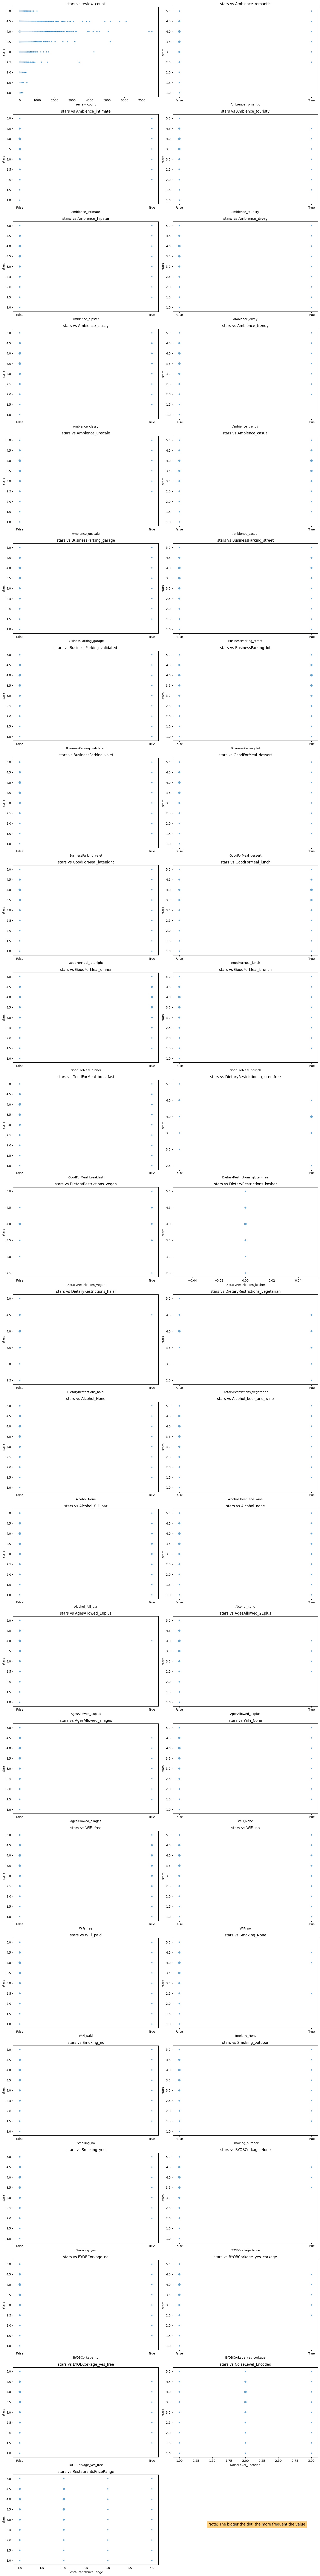

In [17]:
# Creating pairplots with our response variable
print(" ############################################## ")
print(" ################## pairplot ################## ")
print(" ############################################## ")

numeric_cols = df.select_dtypes(include=[np.number]).columns
x_vars = numeric_cols.drop('stars', errors='ignore')
num_vars = len(x_vars)
num_rows = int(np.ceil(num_vars / 2))
plt.figure(figsize=(15, 5 * num_rows))

# Loop through the variables
for i, var in enumerate(x_vars):
    plt.subplot(num_rows, 2, i + 1)
    unique_values = df[var].dropna().unique()

    # Create a frequency column based on both 'var' and 'stars'
    freq_df = df.groupby([var, 'stars']).size().reset_index(name='frequency')

    # Plot using frequency for size
    sns.scatterplot(x=var, y='stars', size='frequency', data=freq_df, alpha=0.7, legend=False)

    plt.title(f'stars vs {var}')
    plt.xlabel(f'{var}')
    plt.ylabel('stars')

    # Check if the variable is binary
    if len(unique_values) == 2 and all(val in [0, 1] for val in unique_values):
        plt.xticks([0, 1], ['False', 'True'])  # Set x-ticks for binary variable

# Add an annotation for dot size
plt.figtext(0.8, 0.02, "Note: The bigger the dot, the more frequent the value", ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.tight_layout()
plt.show()

From the pair plots, given our many binary predictors, it is very difficult to notice a clear trend.

<a id="deep"></a>


## **Deeper Understanding of the Data**
In this section, based on the previous two, we will identify patterns, trends, class imbalances, and outliers in the data, explore the relationships between variables, and identify any potential confounding variables that may impact the analysis

[Return to contents](#contents)

<a id="trends"></a>

### **Trends and Patterns**

In our exploratory data analysis (EDA), we meticulously examined various correlation graphs and other visual representations to identify potential relationships between numerous predictors and our response variable in our Yelp reviews dataset. Our primary objective was to explore the feasibility of employing linear regression. However, this initial analysis revealed that our predictors exhibited minimal to negligible direct correlation with our response variable, which in this context is the `stars` rating.

The core hypothesis driving our study is that the `stars` rating predominantly reflects the quality of food, a factor not directly quantifiable through the available predictors in our dataset. These predictors, while relevant, are intrinsically weak in terms of their individual predictive power regarding the overall customer satisfaction and subsequent star rating. This weakness stems from the complex and subjective nature of food quality assessment, which is not directly captured in our dataset.

Given this scenario, we identified the necessity to implement a more sophisticated and adaptive modeling approach. This led us to the selection of XGBoost (Extreme Gradient Boosting) as our primary analytical method. XGBoost is particularly suited for our dataset for several reasons that we will address later on in our report.

<a id="out"></a>

### **Class Imbalances and Outliers**

In the following section, we will look at class imbalances, look for missing variables, and inspect some of the outliers in our data.

In [18]:
# Helper function for next block
def is_bool_var(df,col):
  """
  For a given dataset (df) and a column name (col)
  Return True if the column represents a boolean variable or
          False if the column represents a non-boolean variable
  """
  # check for the unique values in the said column
  un_vals = df[col].unique()

  # itirate through the unique values and see if they are either 0, 1, or None
  for val in un_vals:
    if val!=0 and val!=1 and val != None and not pd.isna(val) and not pd.isnull(val) and val != np.nan:
        return False
  return True

In [19]:
# define outliers dict to save all the outliers for a given column as key
outliers_dict = {}

# Loop over each column in the DataFrame
for col in df.columns.drop('stars'):
    print(f"################ {col} ################")
    # Check if the column is numeric
    if (not df[col].dtype in ['object', 'category']) and (not is_bool_var(df, col)):
            print("Type of value: Qauntitative Value")
            # Identify and print outliers for continuous variables
            q1 = df[col].quantile(0.1)
            q3 = df[col].quantile(0.9)
            iqr = q3 - q1
            lower_bound = q1 - 2 * iqr
            upper_bound = q3 + 2 * iqr
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            print("Outliers:")
            display(outliers)
            outliers_dict[col] = outliers
    # Check if the column is categorical/bool
    else:
        print("Type of value: Categorical/Boolean Value")
        # Analysis for categorical data
        print("Value Counts:")
        print(df[col].value_counts())
        missing_vals_count = df[col].isnull().sum()
        print("Missing Values Count:",missing_vals_count)
        if missing_vals_count > len(df)/2:
          df.drop(columns=[col])
    print()
    print()

################ name ################
Type of value: Categorical/Boolean Value
Value Counts:
Starbucks                      724
McDonald's                     703
Dunkin'                        510
Subway                         459
Taco Bell                      365
                              ... 
Alma Mater                       1
Varalli                          1
Rosies Deli & Sandwich Shop      1
Jin China                        1
West Side Kebab House            1
Name: name, Length: 43836, dtype: int64
Missing Values Count: 0


################ city ################
Type of value: Categorical/Boolean Value
Value Counts:
Philadelphia       7076
Tampa              3666
Indianapolis       3483
Tucson             3109
Nashville          3051
                   ... 
Washington Twp        1
Cherry Hil            1
Bethel Township       1
Milmont Park          1
UPPER MORELAND        1
Name: city, Length: 1000, dtype: int64
Missing Values Count: 0


################ state #########

,name,city,state,stars,review_count,RestaurantsDelivery,Corkage,HasTV,Open24Hours,ByAppointmentOnly,...,Smoking_None,Smoking_no,Smoking_outdoor,Smoking_yes,BYOBCorkage_None,BYOBCorkage_no,BYOBCorkage_yes_corkage,BYOBCorkage_yes_free,NoiseLevel_Encoded,RestaurantsPriceRange
89,Mike's Ice Cream,Nashville,TN,4.5,593,NaN,<NA>,0,<NA>,0,...,0,0,0,0,0,0,0,0,2.0,2.0
112,Budweiser Brewery Experience,Saint Louis,MO,4.5,605,<NA>,<NA>,<NA>,<NA>,1,...,0,0,0,0,0,0,0,0,NaN,1.0
141,Santa Barbara Shellfish Company,Santa Barbara,CA,4.0,2404,1,<NA>,0,<NA>,0,...,0,0,0,0,0,0,0,0,2.0,2.0
181,Gaylord Opryland Resort & Convention Center,Nashville,TN,3.0,1639,1,<NA>,1,<NA>,1,...,0,0,1,0,0,1,0,0,NaN,3.0
372,The Love,Philadelphia,PA,4.0,618,1,<NA>,0,<NA>,<NA>,...,0,0,0,0,0,0,0,0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150116,Capital Tacos,Wesley Chapel,FL,4.0,754,1,<NA>,0,<NA>,0,...,0,0,0,0,0,0,0,0,2.0,2.0
150138,Cask Social Kitchen,Tampa,FL,4.0,578,1,1,1,<NA>,0,...,0,0,0,0,0,0,0,0,2.0,2.0
150150,Great Basin Brewing,Sparks,NV,4.0,580,NaN,<NA>,1,<NA>,0,...,0,1,0,0,0,0,0,0,2.0,2.0
150214,Nikka Ramen,Goleta,CA,4.5,562,1,1,1,<NA>,0,...,0,0,0,0,0,0,0,0,2.0,2.0




################ RestaurantsDelivery ################
Type of value: Categorical/Boolean Value
Value Counts:
1    31615
0    19230
Name: RestaurantsDelivery, dtype: int64
Missing Values Count: 13771


################ Corkage ################
Type of value: Categorical/Boolean Value
Value Counts:
0    2392
1    1071
Name: Corkage, dtype: int64
Missing Values Count: 61153


################ HasTV ################
Type of value: Categorical/Boolean Value
Value Counts:
1    32049
0    10359
Name: HasTV, dtype: int64
Missing Values Count: 22208


################ Open24Hours ################
Type of value: Categorical/Boolean Value
Value Counts:
0    17
1     7
Name: Open24Hours, dtype: int64
Missing Values Count: 64592


################ ByAppointmentOnly ################
Type of value: Categorical/Boolean Value
Value Counts:
0    4731
1     206
Name: ByAppointmentOnly, dtype: int64
Missing Values Count: 59679


################ NoiseLevel ################
Type of value: Categorical/Boo

,name,city,state,stars,review_count,RestaurantsDelivery,Corkage,HasTV,Open24Hours,ByAppointmentOnly,...,Smoking_None,Smoking_no,Smoking_outdoor,Smoking_yes,BYOBCorkage_None,BYOBCorkage_no,BYOBCorkage_yes_corkage,BYOBCorkage_yes_free,NoiseLevel_Encoded,RestaurantsPriceRange




################ RestaurantsPriceRange ################
Type of value: Qauntitative Value
Outliers:


,name,city,state,stars,review_count,RestaurantsDelivery,Corkage,HasTV,Open24Hours,ByAppointmentOnly,...,Smoking_None,Smoking_no,Smoking_outdoor,Smoking_yes,BYOBCorkage_None,BYOBCorkage_no,BYOBCorkage_yes_corkage,BYOBCorkage_yes_free,NoiseLevel_Encoded,RestaurantsPriceRange


For the purely quantitative variables, non-categorical and non-boolean predictors, the number of rows in the printed Panda table would correspond to the number of outliers. After experimenting with the quantile and the multiplier for the bounds and finding a reasonable value, we see that for the Noise Level Encoding variable, there are no outliers and for the Review Count variable there are 1155 outliers. As for the boolean values, there cannot be outliers given that we've defined them as either 1 or 0. For the categorical predictors, given that these consist of states and names, they cannot be outliers too.

As for the imbalances, decision Trees are more flexible and can be used for both classification and regression tasks. For classification with imbalanced classes, decision trees can be more effective as they can partition the data in a way that isolates minority classes in separate branches, potentially improving the performance of these classes. As for the major imbalances, we can see that there are a lot of predictors that are missing. Particularly, a lot of the `Good For` and `Dietary Restrictions` have over 50% missing values. Given that we believe that these are not going to be the main predictors for our data and that they showed little correlation before, we will drop those.

<a id="base"></a>

## **Baseline Model Implementation: `stars` as categorical**

In this section, we will provide a baseline model idea and will establish an implementation plan. Note, that we will establish `stars` to be categorical, and so we will implement classification models. This is because we perceive the scoring of the user to be a classification psychological choice rather than a numerical score (we wiil expand on this in the next section).

### **Decision Against Linear Regression**

**What is Linear Regression?**

Linear regression is a fundamental statistical and machine learning technique used to predict a continuous outcome variable (dependent variable) based on one or more predictor variables (independent variables). It assumes a linear relationship between the input variables and the output. The basic form of linear regression models the relationship through a linear equation, fitting the best straight line (in simple linear regression) or hyperplane (in multiple linear regression) to the observed data.

**Why Not Use Linear Regression for Our Data?**

Given the context described in the [Trends and Patterns](#trends) section, there are several reasons why linear regression may not be the best fit for our data:

1. **Non-Linear Relationships**: Our dataset likely contains complex, non-linear relationships between the predictors and the target variable. Linear regression, by design, cannot capture these non-linear interactions effectively, leading to underfitting and poor predictive performance.

2. **Assumption Violations**: Linear regression requires certain assumptions (like homoscedasticity, no multicollinearity, normal distribution of errors) to be met for reliable predictions. Given the complexity of our data, these assumptions might be violated, reducing the model's validity.

3. **Outliers and High Leverage Points**: Linear regression models are sensitive to outliers and high leverage points which can disproportionately influence the model’s performance. Our data, being diverse and potentially containing outliers, might lead to skewed or inaccurate results if analyzed with linear regression.

4. **Limited Predictive Power with Complex Data**: The simplicity of linear regression, while its strength in understanding straightforward relationships, becomes a limitation when dealing with multifaceted and high-dimensional data, as in our case. This limitation could lead to a model that oversimplifies the patterns in the data, missing out on crucial insights.

5. **Lack of Model Flexibility**: Unlike ensemble methods like AdaBoost or Random Forest, linear regression lacks the flexibility to adjust its approach based on the data's characteristics. This rigidity can result in suboptimal performance when dealing with complex datasets that require a more nuanced modeling approach.

In conclusion, while linear regression is a powerful tool for certain types of data analysis, the characteristics of our dataset – complexity, potential non-linearity, susceptibility to outliers, and the need for a more sophisticated modeling approach – suggest that alternative methods may yield more accurate and reliable results.

<a id="RF"></a>

### **Random Forest**

**What is Random Forest?**

Random Forest (RF) is an ensemble learning method used for classification, regression, and other tasks. It operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random Forests are correct for decision trees' habit of overfitting to their training set.

**Why use Random Forest?**

Random Forest is popular due to its versatility, ease of use, and robust performance across various types of data. It handles both categorical and numerical data well, is less prone to overfitting compared to single decision trees, and provides a good indicator of feature importance. RF is also efficient in dealing with large datasets and capable of parallel processing, making it a practical choice for complex modeling tasks.

<a id="impST"></a>

### **Implementation of Single Tree with Optimal Max Depth**

Before implementing the Random Forest model, given that we are not implementing a linear regression model at all, we thought it would be a good idea to implement a basic single tree model for comparison.

First, we must prepare the data for our modeling. For this, we will split the data into training and test data, store the format for later modeling, and fill in the missing values for the training and test set.

In [20]:
##### TRAINING SPLIT #####

# Separate predictors and response
X, y = df.drop(columns=['stars', 'name', 'city', 'state', 'NoiseLevel', 'RestaurantsPriceRange2']), df['stars']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Store num format for later use with XGBoost
y_train_num = y_train
y_test_num = y_test

# Convert ratings to string as we are treating this as a classification problem
y_train = y_train.astype(str)
y_test = y_test.astype(str)

In [22]:
# Calculate the mode for each column in the training set
column_modes = X_train.mode().iloc[0]

# Fill missing values with the mode in both training and test sets
X_train = X_train.fillna(column_modes)
X_test = X_test.fillna(column_modes)

**Decision Tree Regressor vs. Classifier**

 During the building of our baseline model, we had to choose between using a decision tree regressor and a decision tree classifier. As a regressor, the decision tree would try to predict the numeric value of the star rating directly, after using regression, we would have to post-process the results to `snap` predictions to their respective 0.5 incremental buckets. As a classification problem, each unique star rating (1, 1.5, 2, 2.5, etc.) would become a separate class. Due to the inherently subjective nature of star ratings input by users and the discreteness of the variable, we decided that the classifier approach treating each rating as a separate class would be more fitting in this case.

**Hyperparameter for our Decision Tree**

In order to create an accurate model, we will investigate different hyperparameters for our decision tree. In this Milestone, we will inspect different maximum depths and different numbers of random forest trees.

For starters, we will investigate max tree depth.

In [23]:
##### FITTING A DECISION TREE #####

first_d = 1
final_d = 20
step = 1
depth_set = range(first_d, final_d + 1, step)

cvmeans = []
cvstds = []
train_scores = []

# Run dtrees for each max_depth in range
for max_depth in depth_set:
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    scores = dt.fit(X_train, y_train).score(X_train, y_train)
    # Crossvalidate
    scores_cv = cross_val_score(estimator=dt, X=X_train, y=y_train, cv=5, n_jobs=-1)
    # Store values
    cvmeans.append(scores_cv.mean())
    cvstds.append(scores_cv.std())
    train_scores.append(scores)

cvstds_np = np.array(cvstds, dtype = float)
cvmeans_np = np.array(cvmeans, dtype = float)

Above we calculated the Mean, STD, and accuracy score for different max tree depths. In the next block, we will graph these results (zooming in at the relevant section) and later print out the relevant accuracy score and the optimal max tree depth.

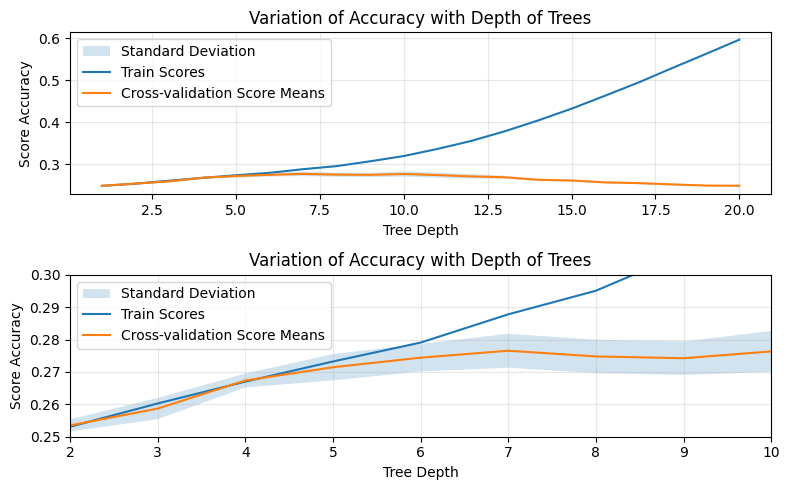

In [24]:
##### PLOTTING THE RESULTS #####

fig, axes = plt.subplots(2, 1, figsize=(8, 5))

axes[0].fill_between(depth_set, cvmeans_np + cvstds_np,
                    cvmeans_np - cvstds_np, alpha=0.2)
axes[0].plot(depth_set, train_scores)
axes[0].plot(depth_set, cvmeans)
axes[0].set_ylabel("Score Accuracy")
axes[0].set_xlabel("Tree Depth")
axes[0].set_title('Variation of Accuracy with Depth of Trees')
axes[0].legend(['Standard Deviation ','Train Scores', 'Cross-validation Score Means'])
axes[0].grid(alpha = 0.3)

axes[1].fill_between(depth_set, cvmeans_np + cvstds_np, cvmeans_np - cvstds_np, alpha=0.2)
axes[1].plot(depth_set, train_scores)
axes[1].plot(depth_set, cvmeans)
axes[1].set_ylabel("Score Accuracy")
axes[1].set_xlabel("Tree Depth")
axes[1].set_title('Variation of Accuracy with Depth of Trees')
axes[1].legend(['Standard Deviation ','Train Scores', 'Cross-validation Score Means'])
axes[1].grid(alpha = 0.3)

axes[1].set_xlim([2,10])
axes[1].set_ylim([0.25, 0.30])

plt.tight_layout()
plt.show()

The graph indicates that the best max-depth according to the conducted CV is somewhere around 7. To find the exact number, we will use the code block below.

In [25]:
#### Summarize basic decision tree results #####

# Find index of highest cv mean and corresponding depth
best_idx = np.argmax(cvmeans)
best_cv_depth = depth_set[best_idx]

dt = DecisionTreeClassifier(max_depth=best_cv_depth, random_state=0)
scores_best_fit = dt.fit(X_train, y_train)

best_cv_tree_train_score = scores_best_fit.score(X_train, y_train)
best_cv_tree_test_score = scores_best_fit.score(X_test, y_test)

# print model results summary
print(
    "The tree of max-depth {} trained on the "
    "full training set, achieves the following accuracy scores:"
    "\n\n\ttrain\t{:.4f}\n\tTEST\t{:.4f}".format(
        best_cv_depth,
        best_cv_tree_train_score,
        best_cv_tree_test_score,
    )
)

The tree of max-depth 7 trained on the full training set, achieves the following accuracy scores:

	train	0.2878
	TEST	0.2829


In [26]:
# print model results summary
print(
    "The tree of max-depth {} trained on the "
    "full training set, achieves the following accuracy scores:"
    "\n\n\ttrain\t{:.4f}\n\tTEST\t{:.4f}".format(
        best_cv_depth,
        best_cv_tree_train_score,
        best_cv_tree_test_score,
    )
)

The tree of max-depth 7 trained on the full training set, achieves the following accuracy scores:

	train	0.2878
	TEST	0.2829


The graphs and the printed values above indicate that a max-depth of 7 will achieve the best accuracy for our purposes, and therefore will be a good hyperparameter for us to set for our single tree model. We've saved the training set and test set accuracy scores so that we can later compare them with our more sophisticated models.

<a id="impRF"></a>

### **Implementation of Random Forest**

Next, we will move on to investigate the accuracy of the Random Forest model. We will utilize GridSearchCV to find the best hyperparameters for this mode. Note that we've used many other hyperparameter values than the ones in the code block below. We've since narrowed it down so that we can show some of the process while minimizing run time if someone were to want to re-run our code.

In [27]:
# Define the parameter grid
param_grid = {
    'n_estimators': [300, 400],
    'max_depth': [15, 20, 30]
}

# Instantiate RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)
best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']

# Train the RandomForestClassifier with the best parameters
rf_best = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
rf_best.fit(X_train, y_train)

# Evaluate the model
random_forest_train_score = rf_best.score(X_train, y_train)
random_forest_test_score = rf_best.score(X_test, y_test)

# Print results summary
print(
    "The random forest with the best parameters (depth-{} and {} trees) achieves the "
    "following accuracy scores:\n\n\ttrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(
        best_max_depth,
        best_n_estimators,
        random_forest_train_score,
        random_forest_test_score,
    )
)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'max_depth': 15, 'n_estimators': 400}
The random forest with the best parameters (depth-15 and 400 trees) achieves the following accuracy scores:

	train	0.5112
	TEST	0.3054


While this is a good start, we would like to have better accuracy for our model. To do so, we decided to use a more advanced model and utilize XGBoost, which we will discuss further and implement in the next section.

<a id="XGBoost"></a>

### **XGBoost**

**What is XGBoost?**

XGBoost, short for "Extreme Gradient Boosting," is an advanced implementation of gradient boosting algorithms. It has gained popularity in the field of machine learning for its efficiency, flexibility, and the quality of its results. Here’s an overview of how XGBoost operates:

1. **Gradient Boosting Framework**: XGBoost is built on the principles of gradient boosting, which involves creating and adding trees sequentially. Each new tree helps to correct errors made by the previously trained trees.

2. **Regularization**: Unlike traditional gradient boosting, XGBoost includes a regularization term in its objective function, which helps to control over-fitting and improves model performance.

3. **Handling Missing Values**: XGBoost has an in-built routine to handle missing values. When faced with missing values, XGBoost can automatically learn what is the best direction to go, either left or right, at each node of a tree.

4. **System Optimization**: XGBoost uses advanced computing techniques like parallel processing, tree pruning, hardware optimization (for example, cache awareness), and efficient memory usage, which makes the algorithm extremely fast and scalable.

5. **Flexibility**: XGBoost allows users to define custom optimization objectives and evaluation criteria, adding a layer of flexibility that’s missing in many other traditional algorithms.

6. **Cross-validation at Each Iteration**: The model can be assessed at each step of boosting, making it easy to get the exact configuration that best fits the model.

**Why use XGBoost?**

Given the complexities discussed in the [Trends and Patterns](#trends) section, XGBoost was chosen as our primary modeling technique for several reasons:

1. **Performance**: XGBoost provides a state-of-the-art performance on a wide range of problems. This is particularly true in cases where the dataset is large or the problem is complex.

2. **Handling Sparse Data**: It is designed to work well with sparse data, which is common in many real-world datasets including ours.

3. **Scalability**: Due to its system optimization and efficient computation, XGBoost scales well to large datasets and can be run on distributed systems.

4. **Feature Importance**: XGBoost provides built-in support for assessing feature importance, which can be invaluable for understanding and refining the model.

5. **Tuning Flexibility**: XGBoost offers a variety of hyperparameters for fine-tuning models, which can be crucial for achieving the best performance on a given task.

In conclusion, the high performance, flexibility, and scalability of XGBoost make it an excellent choice for our data analysis needs, especially in the context of the challenging and intricate data trends we are addressing.

<a id="impXG"></a>

### **Implementation of XGBoost**

In [28]:
# Instantiate XGBoost with default parameters
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', enable_categorical=True, random_state=42)

# Transform target variable for use with XGBoost
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_num)
y_test_enc = le.fit_transform(y_test_num)

# Train the model
xgb_clf.fit(X_train, y_train_enc)

# Predictions
y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)

# Evaluate the model
accuracy_xgb_train = accuracy_score(y_train_enc, y_pred_train)
accuracy_xgb_test = accuracy_score(y_test_enc, y_pred_test)
print(f"Train Accuracy: {accuracy_xgb_train:.4f}")
print(f"Test Accuracy: {accuracy_xgb_test:.4f}")

Train Accuracy: 0.4234
Test Accuracy: 0.3045


In [29]:
# Create a df to display results of the models tested
results_df = pd.DataFrame({'classifier':['Single tree with depth chosen by CV',
                                        'optimized random forest',
                                        'XGBoost'
                                        ],
                           'training accuracy':[best_cv_tree_train_score,
                                                random_forest_train_score,
                                                accuracy_xgb_train
                                               ],
                           'test accuracy':[best_cv_tree_test_score,
                                            random_forest_test_score,
                                            accuracy_xgb_test
                                           ]
                          })

In [30]:
# display results
results_df

,classifier,training accuracy,test accuracy
0,Single tree with depth chosen by CV,0.287801,0.282885
1,optimized random forest,0.511220,0.305401
2,XGBoost,0.423412,0.304472


<a id="tuneXG"></a>

### **Tuned XGBoost**

In [31]:
# Instantiate the XGBoost Classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', enable_categorical=True, random_state=42)

# Transform target variable
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_num)
y_test_enc = le.transform(y_test_num)  # Use transform here, not fit_transform

# Define parameter grid
param_grid = {
    'max_depth': [3, 5],
    'min_child_weight': [1, 10],
    'gamma': [0.5, 2],
    'subsample': [0.6, 1.0],
    'n_estimators': [100, 300]
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(xgb_clf, param_grid, scoring='accuracy', n_jobs=-1, cv=3)
grid_search.fit(X_train, y_train_enc)

# Best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Train model with best parameters
best_xgb_clf = grid_search.best_estimator_

# Make predictions and evaluate
y_pred_train = best_xgb_clf.predict(X_train)
y_pred_test = best_xgb_clf.predict(X_test)
accuracy_xgb_train = accuracy_score(y_train_enc, y_pred_train)
accuracy_xgb_test = accuracy_score(y_test_enc, y_pred_test)

print(f"Train Accuracy with Tuned Model: {accuracy_xgb_train:.4f}")
print(f"Test Accuracy with Tuned Model: {accuracy_xgb_test:.4f}")

# Adding to results DataFrame
results_df.loc[len(results_df.index)] = ['Tuned XGBoost', accuracy_xgb_train, accuracy_xgb_test]

Best parameters: {'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 10, 'n_estimators': 300, 'subsample': 1.0}
Best score: 0.2975702436902612
Train Accuracy with Tuned Model: 0.3249
Test Accuracy with Tuned Model: 0.3063


In [32]:
# display results
results_df

,classifier,training accuracy,test accuracy
0,Single tree with depth chosen by CV,0.287801,0.282885
1,optimized random forest,0.511220,0.305401
2,XGBoost,0.423412,0.304472
3,Tuned XGBoost,0.324905,0.306252


Our single tree with optimized depth had a test accuracy of approx. 0.28. Our tuned RF model had a test accuracy score of approx. 0.3. The simple untuned XGBoost model has a slightly higher test accuracy and a smaller gap between the training accuracy and the test accuracy than the tuned RF model, showcasing that we are off to a good start with using the XGBoost model. Moreover, our tuned XGBoost has a slightly higher accuracy and a slightly smaller gap between the train and the test accuracy scores than the untuned XGBoost.

<a id="base2"></a>

## **Baseline Model Implementation: `stars` as ordinal**

In this section, we will provide a baseline model idea and will establish an implementation plan. This time, we will perceive the `stars` variable as a ordinal one. We will do so for both the RF model and the XGBoost model given that the regular tree performed very poorly and the RF model gives us enough of a baseline for us to test the XGBoost against.

The reason we are doing this is that our accuracy scores for all the classification models tested were relatively low. Now, while we anticipate a low accuracy given that are predictors are weak, we expect that perceiving `stars` as categorical produces a lower score. For example, the model producing a score of 4 for something with a real star rating of 4.5 will be perceived as just as bad of a prediction as a star rating of 1.

The reason we originally decided on a classification model with `stars` as categorical is that, while `stars` is a scale, our psychological perception was that people are classifying to a 5-star class or a 1-star class rather than giving an empirical score. However, upon the above investigation, it seems like this might have been a bit off from us, so we decided to check regression models as well.

Once again, in this section we will be using GridSearchCV. Note that we've used many other hyperparameter values than the ones in the code block below. We've since narrowed it down so that we can show some of the process while minimizing run time if someone were to want to re-run our code.

[Return to contents](#contents)

In [33]:
#Change type to numeric
y_train_placeholder = y_train
y_test_placeholder = y_test

y_train = pd.to_numeric(y_train_placeholder, errors='coerce')
y_test = pd.to_numeric(y_test_placeholder, errors='coerce')

<a id="impRFreg"></a>

### **Implementation of Random Forest (Regression)**

In [34]:
# Define the parameter grid
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [5, 10, 15]
}

# Instantiate RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)
best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']

# Train the RandomForestRegressor with the best parameters
rf_best = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
rf_best.fit(X_train, y_train)

mse_rf_train = mean_squared_error(y_train, rf_best.predict(X_train))
mse_rf_test = mean_squared_error(y_test, rf_best.predict(X_test))

# Print results summary
print(
    "The random forest regressor with the best parameters (depth-{} and {} trees) achieves the "
    "following MSE scores:\n\n\ttrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(
        best_max_depth,
        best_n_estimators,
        mse_rf_train,
        mse_rf_test,
    )
)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'max_depth': 15, 'n_estimators': 400}
The random forest regressor with the best parameters (depth-15 and 400 trees) achieves the following MSE scores:

	train	0.4366
	TEST	0.5602


<a id="finModel"></a>

## **Final Model Implementation**

In this section, we will provide our final model idea and provide the implementation for the said model. As clarified before, we provided different models including classification and regression models. The last model that we tested, was a regression XGBoost model. This will prove to be the best model, and so it was moved to be under this section of our report. We will compare in this section this model to the other model and provide some visualization for our model.

Again, we used GridSearchCV. Note that we've used many other hyperparameter values than the ones in the code block below. We've since narrowed it down so that we can show some of the process while minimizing run time if someone were to want to re-run our code.

[Return to contents](#contents)

**Our Model Pipeline Summary:**

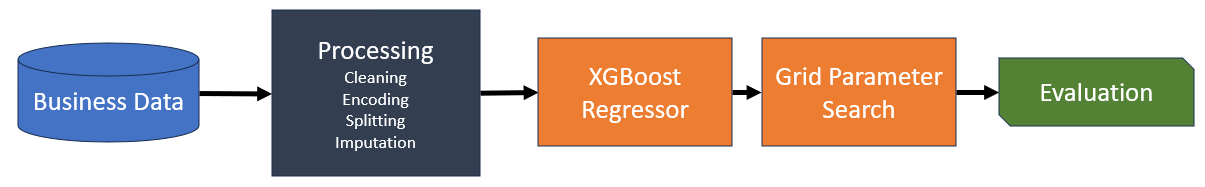

<a id="impXGreg"></a>

### **Implementation of XGBoost (Regression)**

In the bellow XGBoost model, we've decided to implement "Elastic Net" as our regularization technique. "Elastic Net" is especially useful when dealing with highly correlated predictors or when the number of predictors is greater than the number of observations. It combines two different types of regularization: L1 (Lasso) and L2 (Ridge), and can be particularly effective in preventing overfitting.

To use Elastic Net in the context of our XGBoost model, given that this model doesn't use the L1 or L2 penalties in the same way as linear models, we will change some parameters that serve a similar purpose:

* `reg_alpha`: This is the L1 regularization term on weights (equivalent to Lasso).
* `reg_lambda`: This is the L2 regularization term on weights (equivalent to Ridge).
  * Increasing these values will make our model more conservative.

<a id="regular"></a>


#### **Mathematical Explanation of Regularization in XGBoost**

As stated above, in XGBoost, regularization is achieved through two parameters: `reg_alpha` and `reg_lambda`, corresponding to L1 (Lasso) and L2 (Ridge) regularization respectively. Here's a closer look at the mathematics behind these:

#### **L1 Regularization (Lasso) - `reg_alpha`**

The L1 regularization adds a penalty equal to the absolute value of the magnitude of the coefficients. Mathematically, the regularization term is given by:

$$\text{L1 Penalty} = \alpha \sum |w_i|$$

where $w_i$ are the coefficients of the model, and $\alpha$ is the regularization strength (`reg_alpha` in XGBoost).

This regularization technique encourages sparsity, meaning that it can set some coefficients to zero, effectively performing feature selection.

#### **L2 Regularization (Ridge) - `reg_lambda`**

The L2 regularization adds a penalty equal to the square of the magnitude of the coefficients. The regularization term is defined as:

$$\text{L2 Penalty} = \lambda \sum w_i^2$$

where $\lambda$ is the regularization strength (`reg_lambda` in XGBoost).

L2 regularization tends to distribute the error among all the terms, but it does not set any coefficients to zero. This is useful in cases where many features have small but important effects.

#### **Combined Effect in XGBoost**

In XGBoost, both these regularization terms are added to the cost function. The combined cost function with both L1 and L2 regularization becomes:

$$\text{Total Cost} = \text{Original Cost} + \alpha \sum |w_i| + \lambda \sum w_i^2$$

Increasing the values of `reg_alpha` and `reg_lambda` will increase the regularization strength, leading to simpler models that are less likely to overfit. This is particularly useful in scenarios with many features or when dealing with multicollinearity.

In processing, we have attempted to adjust for the discrete nature of given response variable to explore if our model performance could be improved. However, it is apparent here that the post-processed MSE is higher than the original error, therefore we will retain the continuous prediction space in our model output.

In [35]:
# Instantiate the XGBoost Regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define parameter grid
param_grid = {
    'max_depth': [3],
    'min_child_weight': [5],
    'gamma': [0],
    'n_estimators': [400, 500],
    'reg_alpha': [2, 3],
    'subsample': [1.0, 1.5],
    'reg_lambda': [1, 2]
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(xgb_reg, param_grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=3)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best MSE score: {-grid_search.best_score_}")

# Train model with best parameters
best_xgb_reg = grid_search.best_estimator_

# Make predictions and evaluate
y_pred_train = best_xgb_reg.predict(X_train)
y_pred_test = best_xgb_reg.predict(X_test)
mse_xgb_train = mean_squared_error(y_train, y_pred_train)
mse_xgb_test = mean_squared_error(y_test, y_pred_test)

print(f"Train MSE with Tuned Model: {mse_xgb_train:.4f}")
print(f"Test MSE with Tuned Model: {mse_xgb_test:.4f}")


Best parameters: {'gamma': 0, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 500, 'reg_alpha': 3, 'reg_lambda': 2, 'subsample': 1.0}
Best MSE score: 0.5525513409396633
Train MSE with Tuned Model: 0.5267
Test MSE with Tuned Model: 0.5545


The **Training Details** of our final model are:
* Time taken $\approx$ 40 min.
* Number of trees (equivalent to number of epochs) = 500
* Learning rate = default = 0.3
* Note that trees do not have a batch size.

In [36]:
#### POST-PROCESSING (ROUNDING AND TRIMMING) ####

# Function to round predictions to the nearest half point
def round_half_point(predictions):
    rounded_predictions = np.round(predictions * 2) / 2
    # Limit to range 1 to 5
    limited_predictions = np.clip(rounded_predictions, 1, 5)
    return limited_predictions


# Rounding predictions to the nearest half point
rounded_y_pred_train = round_half_point(y_pred_train)
rounded_y_pred_test = round_half_point(y_pred_test)

# Calculating new MSE scores
new_mse_xgb_train = mean_squared_error(y_train, rounded_y_pred_train)
new_mse_xgb_test = mean_squared_error(y_test, rounded_y_pred_test)

print(f"Post-process MSE: {new_mse_xgb_test:.4f}")

Post-process MSE: 0.5756


We theorized that snapping the predictions to nearest value would mirror the given data which could lead to improved accuracy of our model. However, after conducting the post-processing we discovered that MSE has actually increased, which translate to a worse model, therefore we decided to not post-process the predictions made by XGBoost Regressor.

In [37]:
# Create a df to display results of the models tested
results_df_reg = pd.DataFrame({'classifier':['optimized random forest', 'Tuned XGBoost' ],
                           'training MSE':[mse_rf_train, mse_xgb_train],
                           'test MSE':[mse_rf_test, mse_xgb_test]
                          })

# show results
results_df_reg

,classifier,training MSE,test MSE
0,optimized random forest,0.436585,0.560178
1,Tuned XGBoost,0.526741,0.554531


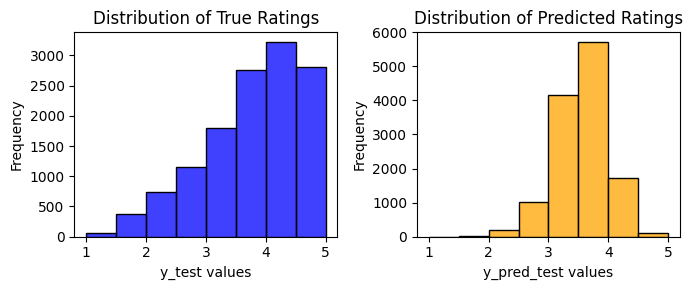

In [38]:
# Create a figure with two subplots side by side
plt.figure(figsize=(7, 3))

bin_edges = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

# First subplot for the distribution of y_test
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
sns.histplot(y_test, bins=bin_edges, color='blue')
plt.title('Distribution of True Ratings')
plt.xlabel('y_test values')
plt.ylabel('Frequency')

# Second subplot for the distribution of y_pred_test
plt.subplot(1, 2, 2)
sns.histplot(y_pred_test, bins=bin_edges, color='orange')
plt.title('Distribution of Predicted Ratings')
plt.xlabel('y_pred_test values')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()  # Adjust the subplots to fit into the figure area.
plt.show()

Visualizing distributions of actual ratings from our data and tuned XGBoost predicted ratings, it is apparant that our final model predicted values between 3 and 4 more frequently, while predictions above 4 were significantly decreased. We have tried to use different objectives in XGBoost such as 'gamma' and 'tweedie' since it might improve performance on skewed data, but squarederror proved the most optimal.

### **Additional Distributions Options**
#### **Gamma Distribution**
**Definition**: A continuous probability distribution characterized by its shape and scale parameters.
   - **Equation**: The probability density function (PDF) of the Gamma distribution is given by:
  $$ f(x; \alpha, \beta) = \frac{\beta^\alpha x^{\alpha-1} e^{-\beta x}}{\Gamma(\alpha)} $$
  for $ x > 0 $, where $ \alpha $ is the shape parameter, $ \beta $ is the rate parameter, and $ \Gamma(\alpha) $ is the gamma function.

#### **Tweedie Distribution**

**Definition**: A class of probability distributions that includes the Gaussian, Poisson, gamma, and positive stable distributions.
   - **General Equation**: It doesn't have a simple closed-form like the Gamma distribution, but its probability mass function (PMF) or probability density function (PDF) can be represented in terms of a power variance function.

In the following blocks are some plots to visualize these two types of distributions:

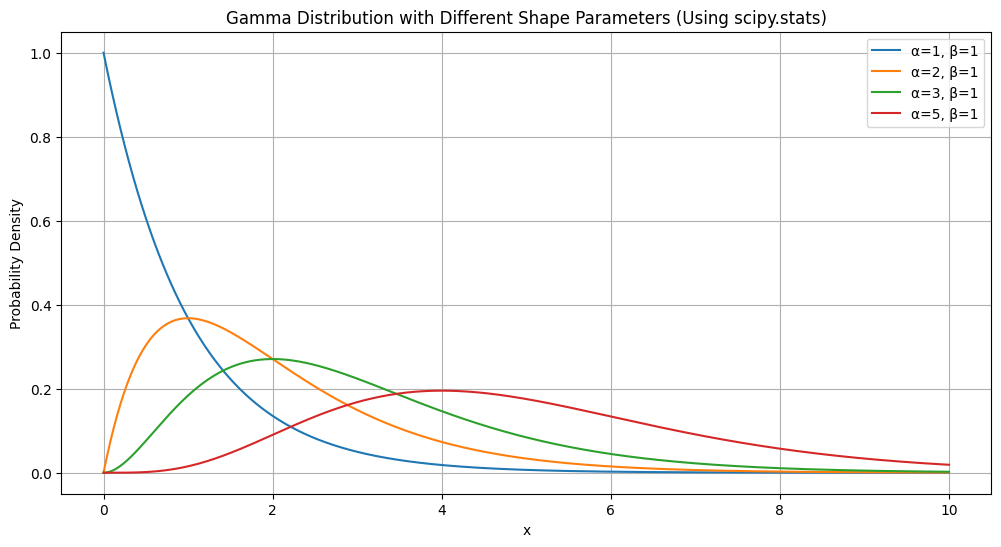

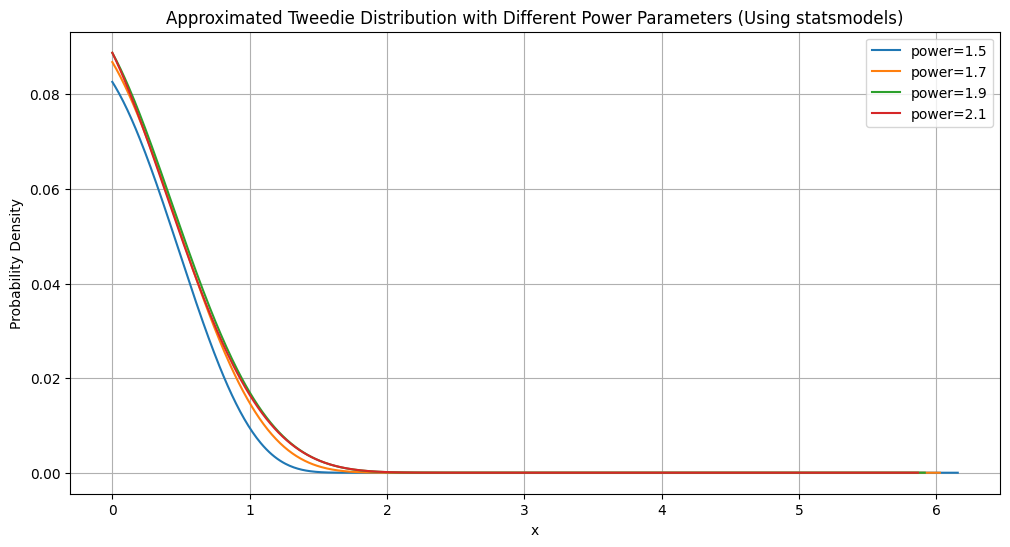

In [39]:
import statsmodels.api as sm

# Gamma Distribution plot using scipy.stats
alpha_values = [1, 2, 3, 5]  # Different shape parameters
beta = 1  # Fixed rate parameter
x = np.linspace(0, 10, 1000)

plt.figure(figsize=(12, 6))

for alpha in alpha_values:
    pdf = sp.stats.gamma.pdf(x, a=alpha, scale=1/beta)
    plt.plot(x, pdf, label=f'α={alpha}, β={beta}')

plt.title('Gamma Distribution with Different Shape Parameters (Using scipy.stats)')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

# Tweedie Distribution plot using statsmodels
powers = [1.5, 1.7, 1.9, 2.1]  # Different power parameters
x_tweedie = np.linspace(0, 10, 1000)

plt.figure(figsize=(12, 6))

for p in powers:
    # Creating a Tweedie family with a specific power parameter
    glm_family = sm.families.Tweedie(var_power=p)

    # Generating the Tweedie distribution data
    # Using the link function and variance power to approximate the PDF
    mean_response = np.exp(glm_family.link.inverse(x_tweedie))  # Mean response
    variance = glm_family.variance(mean_response)  # Variance
    scale = 1  # Fixed scale parameter

    # Approximating the PDF - Note: This is a rough approximation
    pdf_tweedie = (1 / np.sqrt(2 * np.pi * variance * scale)) * np.exp(- (x_tweedie - mean_response)**2 / (2 * variance * scale))

    plt.plot(x_tweedie, pdf_tweedie, label=f'power={p}')

plt.title('Approximated Tweedie Distribution with Different Power Parameters (Using statsmodels)')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


Even though, in theory, we know that we should:
- Use the **Normal distribution** for data that is symmetrically distributed around a mean, including negative values.
- Opt for the **Gamma distribution** when dealing with right-skewed data that is strictly positive and where the variance increases with the mean.
- Choose the **Tweedie distribution** for mixed data types, especially those with a significant proportion of zeroes and a continuous component, typical in insurance claims and ecological data.

Additionally, even though these two seem like promising options given their graphs, they ended up producing a model with more error. This normal-like distribution of the predicted ratings might be due to the Central Limit Theorem when using multiple weak predictors leads to a normally distributed outcome, even if the individual effects are not normally distributed.

**Below you can see a visualization of the first decision tree of the ensemble for our tuned XGBoost regularization model:**

<Figure size 9000x9000 with 0 Axes>

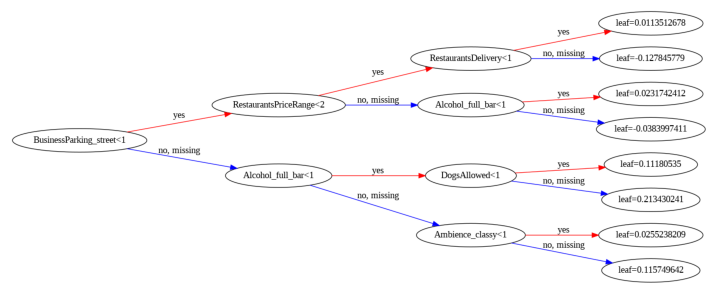

In [40]:
# Decision Tree Visualization (First tree of the ensemble)
plt.figure(figsize=(90, 90))
plot_tree(best_xgb_reg, num_trees=0, rankdir='LR')
plt.show()

To get insight into the XGBoost regressor, we will explore on the of trees in the emsemble. Visualizing one of the trees, we see street parking as the root decision, with lower features including price range, alcohol full bar, and ambience. In this tree, dogs allowed (yes) leaf increases the rating less than dogs not allowed leaf, and delivery-yes leaf seems to marginally increase rating.

In [41]:
perm = PermutationImportance(best_xgb_reg, random_state=42, n_iter=10).fit(X_test, y_pred_test)
eli5.show_weights(perm, feature_names=X.columns.tolist())

Weight,Feature
0.4240 ± 0.0116,review_count
0.2450 ± 0.0059,RestaurantsPriceRange
0.2041 ± 0.0033,BusinessParking_street
0.1828 ± 0.0051,Alcohol_full_bar
0.1444 ± 0.0049,RestaurantsDelivery
0.0821 ± 0.0030,Ambience_casual
0.0731 ± 0.0032,Caters
0.0729 ± 0.0023,DogsAllowed
0.0594 ± 0.0029,RestaurantsTakeOut
0.0576 ± 0.0018,Alcohol_none


Here we used ELI5 Permutation Importance to explore the effect that features had on the response variable in the XGBoost ensamble as a whole. We can see that `review count`, which approximates popularity of the bussiness, had the largest weighted importance followed by `price range`, `street parking`, and presence of `full bar`. Importance of features rapidly decreases from approximately 0.42 for review count to 0.05 for 11th feature by importance - `noise level`.

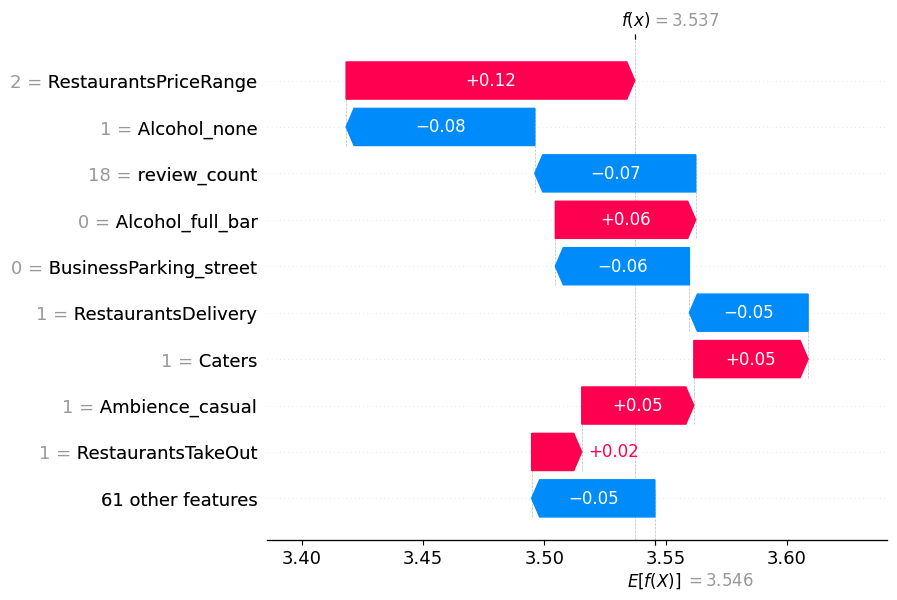

In [42]:
# Create a SHAP explainer and calculate SHAP values
explainer = shap.Explainer(best_xgb_reg)
shap_values = explainer(X_train)

# Plot the SHAP values for the first prediction
shap.plots.waterfall(shap_values[0])

Evaluating the model further using SHAP (SHapley Additive exPlanations), we obtain insight into the contribution of each feature to a specific prediction made by our final model.
The plot indicates that the feature RestaurantsPriceRange (assuming the value 2) has the highest positive impact on the model's prediction, while the feature Alcohol_none (assuming the value 1, that is no alcohol served) has the highest negative impact.

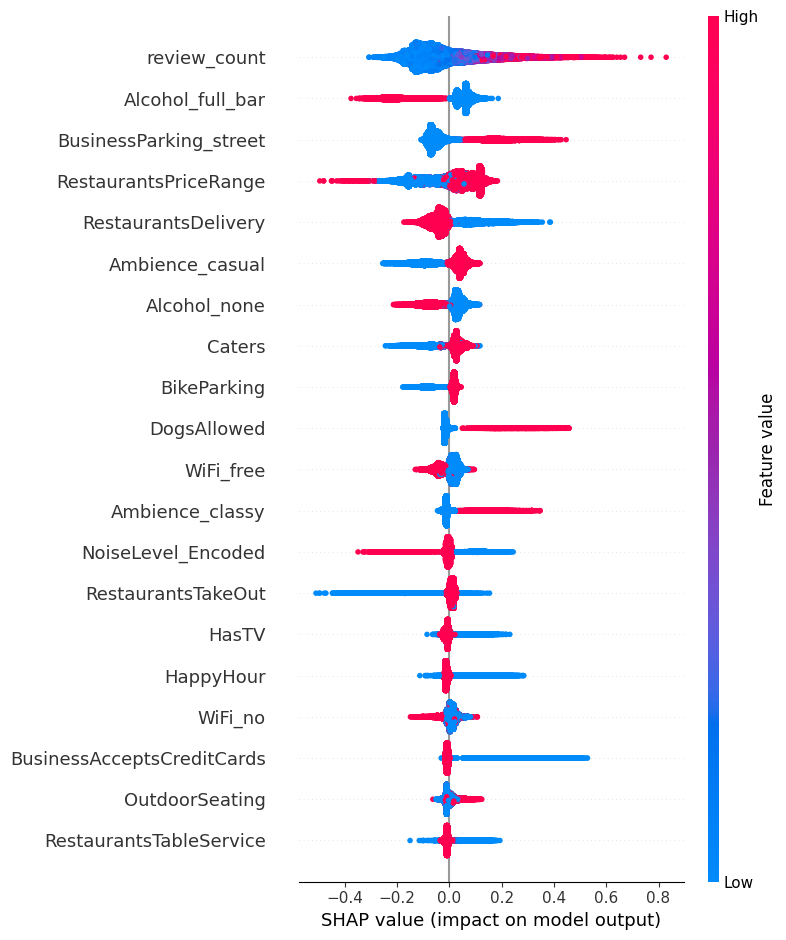

In [43]:
# SHAP for overall predictions
shap.summary_plot(shap_values, X_train)

Getting a SHAP summary plot, we were able to get insight into feature impact onto the overall final model. On the x-axis, we have SHAP values that indicate the impact on the stars rating output variable. Each dot represents the SHAP value for a feature for an individual sample. The color represents the value of the feature, from low (blue) to high (red). The density of the dots represents the distribution of the SHAP values for each feature. A higher density means that the feature more consistently contributes in a specific direction.


**Selected features analysis:**

*   Alcohol_full_bar: This feature has a mix of positive and negative SHAP values but leans towards positive, indicating that having a full bar is associated with higher output values from the model

*   RestaurantsPriceRange: This feature has a strong positive influence when it takes on higher values, as indicated by the red dots to the right.

*   NoiseLevel_Encoded: The impact of noise level is mixed, as shown by the spread of dots on both sides of zero, indicating that it can both increase or decrease the model's output depending on the specific noise level encoded value.In this case it seems that higher noise is associated with lower predicted rating.






<a id="conc"></a>

## **Conclusion**

In this section, we will provide our conclusion from this data science project, inferences, and future work.

[Return to contents](#contents)

<a id="conc&inf"></a>

### **Conclusion and Inferences**


*   Our final XGBoost Regressor model, given unseen data in the form of business parameters as recorded in the Yelp database can predict the stars rating of the business with MSE OF 0.554531. This translates to a Root Mean Square Error (RMSE) of 0.744. In effect, the mean difference between our prediction and a true stars value is 0.744 stars. We believe this is an acceptable performance for our model since while it might not predict the exact rating accurately, the model should on average successfully differentiate between a poor rating and a good rating.

*   While the tuned XGBoost proved to be the most optimal model, we suspect that there is a significant irreducible error present due to unobserved variables of food quality and service quality. It seems reasonable that those two variables, especially food quality, would play a significant role in an individual's rating of a food-related business. Since food quality was not captured in the data we retrieved, the features that we have will most likely predict the rating only to a limited degree as observed in the performance of our models.

*   However, there is a value in our model other than predicting the rating. The importance of features in our XGBoost Regressor model can be valuable for food business owners and other decision-makers when deciding if a certain ambiance, amenities, or other aspects of the establishment are worth the expense when attempting to increase the rating of the restaurant by customers in the Yelp database. Since we do not establish causality, caution should be exercised in making such conclusions, however.

*   Exploring causality, it is plausible, but not proven that the availability of alcohol would lead on average to a slightly improved rating, however, the number of reviews (as a proxy to popularity), could be the result of a good rating, rather than high number of reviews causing better rating. Therefore we only establish a correlation between variables here, rather than the direction of causality.

<a id="future"></a>


### **Future Work and Scope of Improvement**


*   As we evaluated our models and considered our `stars` response variable, it became clear to us that the variable as presented in the dataset has artificially coarse granularity. That is when Yelp processed the ratings for each business in their database, they rounded the average rating which was presumably a float, to the nearest value in increments of 0.5. Such post-processing makes it difficult to build a robust model and effectively counteracts XGBoost's strength of using weak learners. The rounding method destroys the detail of continuous response variables by making the values discrete, and effectively obfuscates the impact of weak predictors.

*   This issue can be resolved by calculating continuous `stars` ratings using the reviews dataset which was one of the three datasets from Yelp we originally explored. Since this data processing would require significant computational resources and time, it will be left for future work.

*   We were also considering taking a closer look into the other databases that Yelp offers. Particularly, we were thinking of looking into the text of the review, parsing, and processing it, and gathering information through there. This could offer more information about the food itself, which is what we believe is the direct causel variable when it comes to `stars`.